In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Import Required Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/Traffic Violations Analysis Dataset/Training data',
                                              target_size=(32, 32), batch_size=128, class_mode='binary', subset='training')

validation_generator = datagen.flow_from_directory('/content/drive/MyDrive/Traffic Violations Analysis Dataset/validation data',
                                                   target_size=(32, 32), batch_size=128, class_mode='binary', subset='validation')

Found 953 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## Step 3: Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

## Step 4: Build the CNN Model

In [ ]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(32,32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,481 (439.38 KB)

 Trainable params: 112,481 (439.38 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Step 6: Regularization by Early Stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Step 7: Train the Model

In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 873ms/step - accuracy: 0.5138 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 911ms/step - accuracy: 0.5401 - loss: 0.6849 - val_accuracy: 0.6500 - val_loss: 0.6784
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 808ms/step - accuracy: 0.5781 - loss: 0.6748 - val_accuracy: 0.7250 - val_loss: 0.6503
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 731ms/step - accuracy: 0.6577 - loss: 0.6431 - val_accuracy: 0.6000 - val_loss: 0.6593
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 657ms/step - accuracy: 0.6314 - loss: 0.6433 - val_accuracy: 0.7250 - val_loss: 0.6055
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 520ms/step - accuracy: 0.6759 - loss: 0.5956 - val_accuracy: 0.7750 - val_loss: 0.5942
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 507ms/step - accuracy: 0.6852 - loss: 0.5995 - val_accuracy: 0.7500 - val_loss: 0.6008
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.7041 - loss: 0.5945 - val_accuracy: 0.7250 - v

## Step 8: Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8250 - loss: 0.4940
Validation Loss: 0.4939746856689453
Validation Accuracy: 0.824999988079071


## Step 9: Training History Visualization for Accuracy and Loss

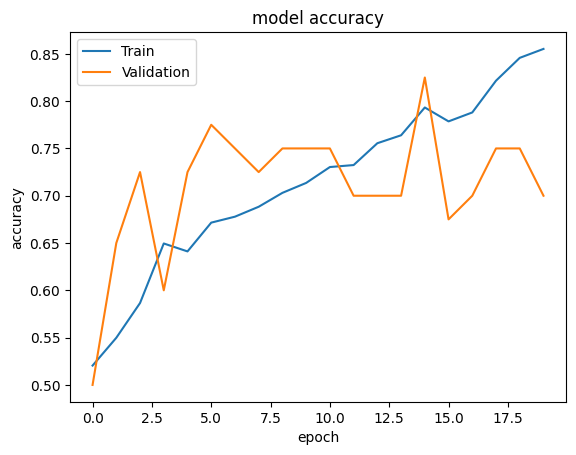

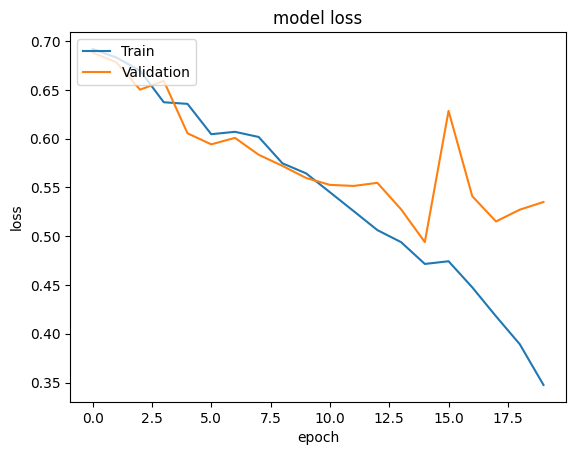

In [ ]:
# For accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# For loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()